# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import datetime as dt
from scipy.stats import linregress
import json

%load_ext autoreload
%autoreload 2
# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv")
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from ratelimit import limits

import requests

# one_minute = 60

# @limits(calls=60, period=one_minute)
# def call_api(url):
#     response = requests.get(url)

#     if response.status_code != 200:
#         raise Exception('API response: {}'.format(response.status_code))
#     return response

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#Exploratory test 
test =  ["Houston"]
results = []
for city in test:
    query_url = f"{url}appid={api_key}&q={city}"
    response = requests.get(query_url)
    response_json = response.json()
print (json.dumps(response_json, indent = 4))   
print(response_json)
#test retrieval of data using test city
weather_id=response_json["weather"][0]["id"]
city_id = response_json["id"]
city_name_test = response_json["name"]
print(city_id,city_name_test)

{
    "coord": {
        "lon": -95.36,
        "lat": 29.76
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 285.14,
        "feels_like": 283.34,
        "temp_min": 284.15,
        "temp_max": 285.93,
        "pressure": 1021,
        "humidity": 66
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.21,
        "deg": 63
    },
    "clouds": {
        "all": 40
    },
    "dt": 1607200135,
    "sys": {
        "type": 1,
        "id": 4850,
        "country": "US",
        "sunrise": 1607173375,
        "sunset": 1607210524
    },
    "timezone": -21600,
    "id": 4699066,
    "name": "Houston",
    "cod": 200
}
{'coord': {'lon': -95.36, 'lat': 29.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 285.14, '

In [3]:

#
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name = []
lat =[]
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date = []
# Loop through each city
#print(city_id,name)
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}"
    
    try: 
        loop_response = requests.get(query_url).json()
        city_name.append(loop_response["name"])
        lat.append(loop_response["coord"]["lat"])
        lng.append(loop_response["coord"]["lon"])
        max_temp.append(loop_response["main"]["temp_max"])
        humidity.append(loop_response["main"]["humidity"])
        cloudiness.append(loop_response["clouds"]["all"])
        wind_speed.append(loop_response["wind"]["speed"])
        country.append(loop_response["sys"]["country"])
        date.append(loop_response["dt"])                    
        print(loop_response["id"],loop_response["name"])
    except:
        print("Not found.")
        pass

1337606 Eydhafushi
3981391 Tomatlán
3414079 Olafsvik
Not found.
2138555 Poum
1895695 Kushima
5044290 Saint Anthony
5924351 Clyde River
1015776 Bredasdorp
3421319 Nuuk
3369157 Cape Town
5848280 Kapaa
1507390 Dikson
4032243 Vaini
4020109 Atuona
4030556 Rikitea
3652758 Puerto Baquerizo Moreno
3466165 Cidreira
2110227 Butaritari
964420 Port Elizabeth
2163355 Hobart
2130146 Hanawa
6201424 Mataura
6185377 Yellowknife
2165087 Gold Coast
2013279 Vostok
1106643 Quatre Cocos
3347719 Luena
2978072 Saint-Médard-en-Jalles
3347019 Mossamedes
780687 Berlevåg
2609894 Yantarnyy
608036 Temir
4944903 Nantucket
3833367 Ushuaia
3427761 Tigre
933995 Souillac
3874787 Punta Arenas
2119283 Zyryanka
512413 Pashiya
3423146 Ilulissat
779261 Kjøllefjord
2017155 Saskylakh
1513491 Yangi Marg`ilon
1736660 Kota Belud
3652764 Puerto Ayora
2206939 Bluff
Not found.
5106841 Albany
1819729 Hong Kong
5880054 Barrow
986717 Kruisfontein
3372964 Lagoa
3424607 Tasiilaq
3374083 Bathsheba
6165406 Thompson
551846 Lagan
3404558 Cab

2315417 Inongo
2019135 Nizhniy Kuranakh
5850554 Makakilo City
Not found.
1488903 Turukhansk
Not found.
1235846 Matara
130245 Javānrūd
1855540 Naze
1850708 Tanabe
935616 Le Port
1067565 Beloha
3372760 Praia da Vitória
2993679 Mitry-Mory
2392505 Nikki
5746545 Portland
6050066 La Ronge
Not found.
293842 Kiryat Gat
3430545 Morón
2427637 Mongo
2122783 Katangli
583345 Aleksandrov Gay
3395981 Maceió
5975004 High Level
1848976 Wajima
2610343 Vestmanna
3108680 Soria
3837056 San Luis
1586350 Cam Ranh
1688696 San Policarpo
579327 Bammatyurt
3899539 Antofagasta
3382160 Cayenne
Not found.
2032614 Baruun-Urt
1272502 Diu
3461370 Imbituba
1795565 Shenzhen
652977 Keuruu
Not found.
146490 Chlórakas
2162683 Innisfail
5129852 Oneonta
3443631 Bella Union
4956335 Yarmouth
2109701 Auki
2074113 Collie
1337612 Dhidhdhoo
5282804 Bridgeport
2112309 Katsuura
2128206 Shibetsu
3380290 Sinnamary
1812805 Dinghaicun
2454955 Kolokani
3936456 Lima
686090 Asău
217695 Bunia
365763 Tonj
3357114 Grootfontein
6324729 Halifax

In [4]:
#Check to make sure names were appended
print(city_name)

['Eydhafushi', 'Tomatlán', 'Olafsvik', 'Poum', 'Kushima', 'Saint Anthony', 'Clyde River', 'Bredasdorp', 'Nuuk', 'Cape Town', 'Kapaa', 'Dikson', 'Vaini', 'Atuona', 'Rikitea', 'Puerto Baquerizo Moreno', 'Cidreira', 'Butaritari', 'Port Elizabeth', 'Hobart', 'Hanawa', 'Mataura', 'Yellowknife', 'Gold Coast', 'Vostok', 'Quatre Cocos', 'Luena', 'Saint-Médard-en-Jalles', 'Mossamedes', 'Berlevåg', 'Yantarnyy', 'Temir', 'Nantucket', 'Ushuaia', 'Tigre', 'Souillac', 'Punta Arenas', 'Zyryanka', 'Pashiya', 'Ilulissat', 'Kjøllefjord', 'Saskylakh', 'Yangi Marg`ilon', 'Kota Belud', 'Puerto Ayora', 'Bluff', 'Albany', 'Hong Kong', 'Barrow', 'Kruisfontein', 'Lagoa', 'Tasiilaq', 'Bathsheba', 'Thompson', 'Lagan', 'Cabedelo', 'Tessalit', 'Haines Junction', 'Lüderitz', 'Ancud', 'Nísia Floresta', 'Naberera', "Severo-Kuril'sk", 'Dingle', 'Marawi', 'Hithadhoo', 'Lorengau', 'Springbok', 'Whitehorse', 'Kununurra', 'Qaanaaq', 'Trairi', 'Ati', 'Şereflikoçhisar', 'Gijang', 'Khatanga', 'Mahébourg', 'Songwa', 'Calama',

In [5]:
#Check to make sure dates were appended since last list
print(date)

[1607199915, 1607199915, 1607199915, 1607199915, 1607199915, 1607199772, 1607199916, 1607199916, 1607199916, 1607199632, 1607199916, 1607199916, 1607199916, 1607199916, 1607199916, 1607199738, 1607199916, 1607199916, 1607199916, 1607199623, 1607199916, 1607199916, 1607199916, 1607199839, 1607199917, 1607199917, 1607199917, 1607199917, 1607199917, 1607199917, 1607199917, 1607199917, 1607199831, 1607199679, 1607199917, 1607199917, 1607199917, 1607199917, 1607199917, 1607199917, 1607199918, 1607199918, 1607199918, 1607199918, 1607199918, 1607199918, 1607199918, 1607199640, 1607199901, 1607199918, 1607199918, 1607199918, 1607199918, 1607199918, 1607199918, 1607199918, 1607199919, 1607199833, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199919, 1607199920, 1607199920, 1607199920, 1607199920, 1607199920, 1607199920, 1607199920, 1607199847, 1607199920, 1607199920, 1607199920, 1607199787, 160

In [6]:
#Check loop response
print(loop_response)

{'coord': {'lon': -128.6, 'lat': 54.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 281.15, 'feels_like': 278.27, 'temp_min': 281.15, 'temp_max': 281.15, 'pressure': 1007, 'humidity': 93}, 'visibility': 9656, 'wind': {'speed': 3.1, 'deg': 140}, 'rain': {'1h': 0.92}, 'clouds': {'all': 90}, 'dt': 1607199760, 'sys': {'type': 1, 'id': 984, 'country': 'CA', 'sunrise': 1607186390, 'sunset': 1607213469}, 'timezone': -28800, 'id': 6162949, 'name': 'Terrace', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}
weather_df = pd.DataFrame(city_dict)
weather_df.to_csv(r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv", index = False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eydhafushi,5.10,73.07,301.24,77,100,5.43,MV,1607199915
1,Tomatlán,19.93,-105.25,303.54,49,86,2.69,MX,1607199915
2,Olafsvik,64.89,-23.71,268.60,88,60,3.23,IS,1607199915
3,Poum,-20.23,164.02,298.11,77,0,4.57,NC,1607199915
4,Kushima,31.46,131.23,284.15,82,58,1.70,JP,1607199915


In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.883268,21.554689,285.095329,73.550622,51.761989,3.686057,1.607200e+09
std,33.360395,90.527664,15.166026,19.879499,40.052326,2.458310,6.947316e+01
min,-54.800000,-175.200000,238.840000,7.000000,0.000000,0.090000,1.607199e+09
25%,-7.990000,-55.565000,274.820000,66.000000,4.000000,1.790000,1.607200e+09
50%,24.340000,24.730000,289.150000,78.000000,53.000000,3.230000,1.607200e+09
75%,47.215000,102.570000,298.150000,88.000000,91.000000,5.000000,1.607200e+09
max,78.220000,179.320000,307.150000,100.000000,100.000000,16.500000,1.607200e+09


In [9]:
len(weather_df)

563

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Skipping step since max humidity = 100 (commented out process I would take if I did have humidity >100, using drop method)

In [10]:
#  Get the indices of cities that have humidity over 100%.
#high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
#high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = weather_df.drop(index = , inplace =False)
#clean_city_data

In [12]:
#Creating clean city data using loc to make sure
under_100 = weather_df.loc[weather_df["Humidity"]<= 100]
clean_city_data = under_100
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eydhafushi,5.10,73.07,301.24,77,100,5.43,MV,1607199915
1,Tomatlán,19.93,-105.25,303.54,49,86,2.69,MX,1607199915
2,Olafsvik,64.89,-23.71,268.60,88,60,3.23,IS,1607199915
3,Poum,-20.23,164.02,298.11,77,0,4.57,NC,1607199915
4,Kushima,31.46,131.23,284.15,82,58,1.70,JP,1607199915
...,...,...,...,...,...,...,...,...,...
558,Gangāpur,26.48,76.72,290.98,36,0,1.89,IN,1607199953
559,Talnakh,69.49,88.40,264.15,92,75,7.00,RU,1607199953
560,Kasiri,8.94,-13.11,301.15,74,75,4.10,SL,1607199954
561,Urengoy,65.97,78.37,260.69,95,97,5.58,RU,1607199797


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

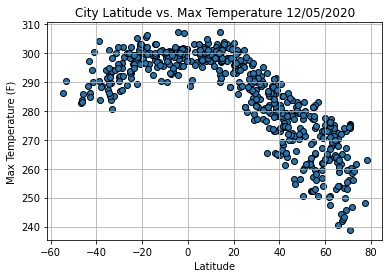

In [13]:
latitude = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, max_temp, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

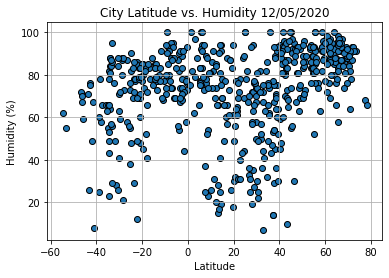

In [14]:
latitude = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, humidity, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Humidity.png")
plt.show()

In [15]:
#Describe results

## Latitude vs. Cloudiness Plot

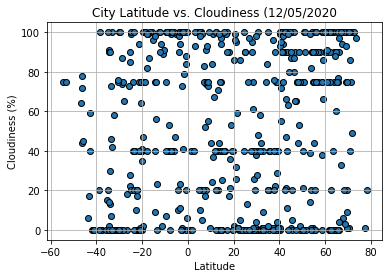

In [16]:
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, cloudiness, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Cloudiness.png")
plt.show()

In [17]:
#Describe results

## Latitude vs. Wind Speed Plot

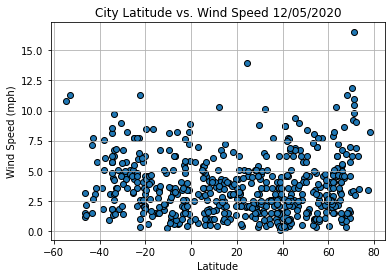

In [37]:
latitude = clean_city_data["Lat"]
winds = clean_city_data["Wind Speed"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, winds, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Wind Speed.png")
plt.show()

In [19]:
#Describe results

## Linear Regression

In [20]:
#Use loc to get data for each hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7458910657364413


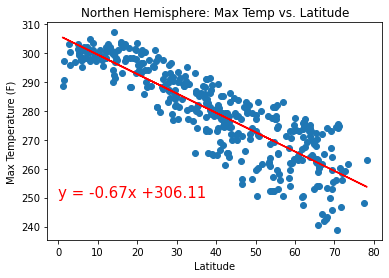

In [33]:
north_lat = northern_hemisphere["Lat"]
north_max_temp =northern_hemisphere["Max Temp"]
plt.scatter(north_lat, north_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Northen Hemisphere: Max Temp vs. Latitude")

# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_max_temp)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(0,250), fontsize = 15, color = "red")
plt.savefig("Northen Hemisphere-Max Temp vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [ ]:
# Describe Results

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3919672336032769


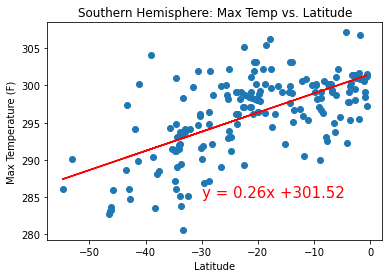

In [34]:
south_lat = southern_hemisphere["Lat"]
south_max_temp = southern_hemisphere["Max Temp"]
plt.scatter(south_lat, south_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_max_temp)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(-30,285), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Max Temp vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [ ]:
#Describe results

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13792617348573988


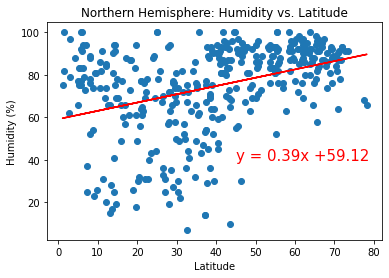

In [28]:
north_lat = northern_hemisphere["Lat"]
north_humidity =northern_hemisphere["Humidity"]
plt.scatter(north_lat,north_humidity)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_humidity)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (45,40), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [ ]:
#Describe the results

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13140722162665686


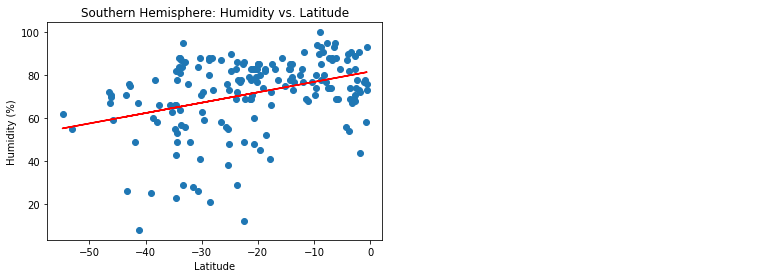

In [32]:
south_lat = southern_hemisphere["Lat"]
south_humidity = southern_hemisphere["Humidity"]
plt.scatter(south_lat,south_humidity)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_humidity)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (45,40), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [ ]:
#Describe the results

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03629088113578431


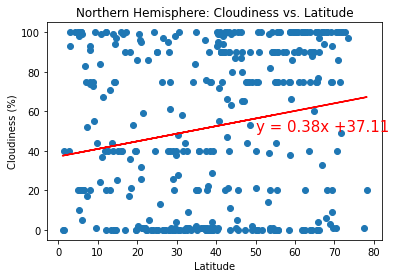

In [36]:
north_lat = northern_hemisphere["Lat"]
north_cloudiness =northern_hemisphere["Cloudiness"]
plt.scatter(north_lat,north_cloudiness)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloudiness)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (50,50), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Cloudiness vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [ ]:
# Describe the results

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Describe the results

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03318921489183277


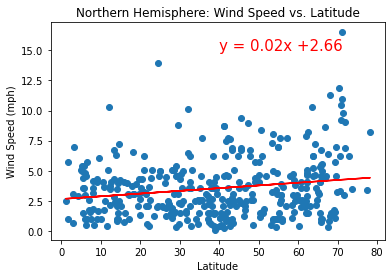

In [39]:
north_lat = northern_hemisphere["Lat"]
north_winds =northern_hemisphere["Wind Speed"]
plt.scatter(north_lat,north_winds)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_winds)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (40,15), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Wind Speed vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [ ]:
# Describe the results

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Describe the results